# Pipelines in sklearn

Sequentially apply a list of transforms and a final estimator. Intermediate steps of pipeline must implement fit and transform methods and the final estimator only needs to implement fit.

In [24]:
import pandas as pd
import numpy as np

In [25]:
df=pd.read_csv('https://raw.githubusercontent.com/suvoooo/Machine_Learning/master/winequality-red.csv',sep=";")

In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
# Check for nulls
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


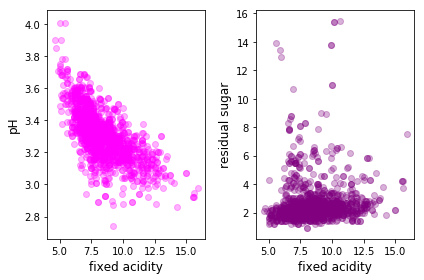

In [28]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1) # fisrt plot
plt.scatter(df['fixed acidity'], df['pH'], color='magenta', label='check', alpha=0.3)
plt.xlabel('fixed acidity',fontsize=12)
plt.ylabel('pH',fontsize=12)


plt.subplot(1,2,2) # 2nd plot
plt.scatter(df['fixed acidity'], df['residual sugar'], color='purple', label='check', alpha=0.3)
plt.xlabel('fixed acidity',fontsize=12)
plt.ylabel('residual sugar',fontsize=12)
plt.tight_layout()
plt.show()

Set label and features apart

Label = wine quality from 0 to 10

In [29]:
X=df.drop(['quality'],axis=1)
Y=df['quality']

Import packages for pipelines

In [30]:
from sklearn.svm import SVC # SVM
from sklearn.preprocessing import StandardScaler # Subtracts mean from each feature then scales to unit variance

Create a pipeline of standard scaler and support vector machine. <br>
Steps are tuples consisting of
- name and
- instance of transformer or estimator <br>

'scaler' and 'SVM' can be anything, they're just names. make_pipeline will not need a name if you choose.

In [31]:
steps = [('scaler',StandardScaler()),('SVM',SVC())] # Notice names then the instance of transformer or estimator
### E.G. we named the scaling function "scaler" and it's called "StandardScaler"

In [32]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline(steps) # define pipeline object

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=4815, stratify=Y)

In [34]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

SVM is optimized using two parameters: gamma, C

GridSearchCV to find these parameters

In [35]:
parameters={'SVM__C':[0.001,0.1,10,100,10e5],'SVM__gamma':[0.1,0.01]}

In [36]:
grid=GridSearchCV(pipeline,param_grid=parameters,cv=5)

In [37]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('SVM',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001

In [38]:
print("score = %3.2f" %(grid.score(X_test,y_test)))

score = 0.70


In [39]:
print(grid.best_params_)

{'SVM__C': 10, 'SVM__gamma': 0.1}


#### Now without pipeline

In [42]:
scale = StandardScaler().fit(X_train)

In [43]:
X_train_scaled = scale.transform(X_train)

In [44]:
grid = GridSearchCV(SVC(), param_grid=parameters, cv=5)

In [46]:
# grid.fit(X_train_scaled, y_train)